In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset
data = pd.read_csv('bestsellers with categories.csv')


In [5]:
# Display the first few rows of the dataset
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [8]:
#STEP 1 : Data Cleaning and Preprocessing:
#we check for any missing data in the dataset and handle it using appropriate imputation strategies.
missing_values = data.isnull().sum()
missing_values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
#As we can see, there are no missing values, so we don't need to handle these anymore.

In [10]:
#We detect outliers using statistical methods (e.g., z-score) and address them if necessary.
from scipy import stats

# Detect outliers using z-scores
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
outliers = np.where(z_scores > 3)

# Address outliers
# dropping rows with outliers
data = data[(z_scores < 3).all(axis=1)]

In [11]:
#Feature Engineering and Transformation
#We perform any necessary feature engineering or transformation to prepare the data for analysis. 
#This can include encoding categorical variables, creating new features, or normalizing data.

# Encode categorical variables
data['Genre'] = data['Genre'].astype('category').cat.codes


In [17]:
# Normalize numerical features if necessary
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['User Rating', 'Reviews', 'Price']] = scaler.fit_transform(data[['User Rating', 'Reviews', 'Price']])

In [18]:
#Finally, we display the first few rows of the cleaned and preprocessed dataset.

data.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,0.777778,0.439171,0.190476,2016,1
1,11/22/63: A Novel,Stephen King,0.666667,0.051114,0.523810,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,0.777778,0.480493,0.357143,2018,1
3,1984 (Signet Classics),George Orwell,0.777778,0.542514,0.142857,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,0.888889,0.193496,0.285714,2019,1


#STEP 2 : Exploratory Data Analysis




In [22]:
#We start with basic statistical analysis, 
#including measures of central tendency (mean, median) and dispersion (standard deviation).

# Display basic statistics for numerical columns
numeric_data = data.select_dtypes(include=[np.number])
print("Basic statistics:\n", numeric_data.describe())

Basic statistics:
        User Rating     Reviews       Price         Year       Genre
count   513.000000  513.000000  513.000000   513.000000  513.000000
mean      0.705653    0.266916    0.279541  2014.007797    0.573099
std       0.221289    0.212896    0.169866     3.204601    0.495110
min       0.000000    0.000000    0.000000  2009.000000    0.000000
25%       0.555556    0.096165    0.166667  2011.000000    0.000000
50%       0.777778    0.197605    0.238095  2014.000000    1.000000
75%       0.888889    0.411116    0.357143  2017.000000    1.000000
max       1.000000    1.000000    1.000000  2019.000000    1.000000


In [23]:
# Calculate mean, median, and standard deviation for each numerical column
# Calculate mean, median, and standard deviation for each numerical column
mean_values = numeric_data.mean()
median_values = numeric_data.median()
std_dev_values = numeric_data.std()

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard Deviation values:\n", std_dev_values)

Mean values:
 User Rating       0.705653
Reviews           0.266916
Price             0.279541
Year           2014.007797
Genre             0.573099
dtype: float64

Median values:
 User Rating       0.777778
Reviews           0.197605
Price             0.238095
Year           2014.000000
Genre             1.000000
dtype: float64

Standard Deviation values:
 User Rating    0.221289
Reviews        0.212896
Price          0.169866
Year           3.204601
Genre          0.495110
dtype: float64


In [25]:
#We examine the correlations between different numerical variables to understand their relationships.

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
              User Rating   Reviews     Price      Year     Genre
User Rating     1.000000  0.220049 -0.170906  0.263362 -0.226116
Reviews         0.220049  1.000000 -0.153174  0.326637 -0.245545
Price          -0.170906 -0.153174  1.000000 -0.191355  0.193649
Year            0.263362  0.326637 -0.191355  1.000000  0.019336
Genre          -0.226116 -0.245545  0.193649  0.019336  1.000000


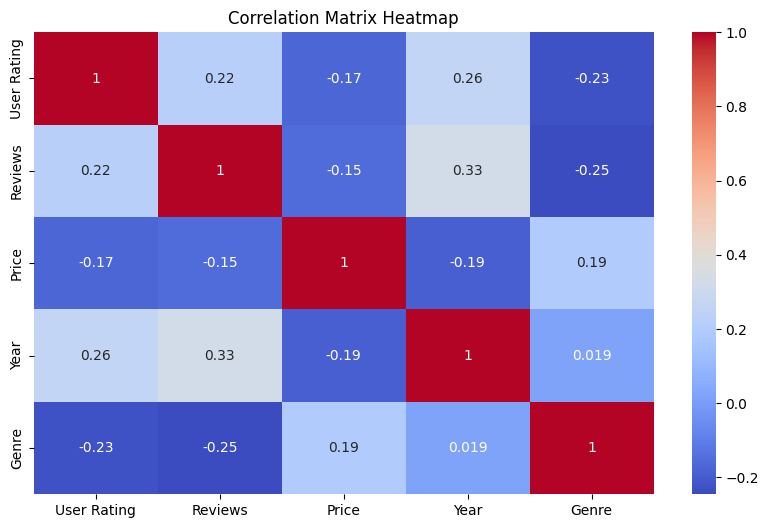

In [26]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [27]:
# Advanced Grouping and Aggregation
# Group by 'Genre' and calculate mean ratings and total reviews
genre_stats = data.groupby('Genre').agg({
    'User Rating': 'mean',
    'Reviews': 'sum'
}).reset_index()

print("Genre statistics:\n", genre_stats)

Genre statistics:
    Genre  User Rating    Reviews
0      0     0.763572  71.706230
1      1     0.662509  65.221653


In [28]:
# Group by 'Author' and calculate total reviews and mean price
author_stats = data.groupby('Author').agg({
    'Reviews': 'sum',
    'Price': 'mean'
}).reset_index()

print("Author statistics:\n", author_stats)

Author statistics:
                          Author   Reviews     Price
0              Abraham Verghese  0.244990  0.261905
1                Adam Gasiewski  0.078027  0.142857
2                 Adam Mansbach  0.241769  0.214286
3                     Adir Levy  0.206306  0.309524
4    Admiral William H. McRaven  0.257775  0.261905
..                          ...       ...       ...
233             Walter Isaacson  0.470727  0.484127
234               William Davis  0.378469  0.142857
235            William P. Young  0.998579  0.190476
236            Wizards RPG Team  1.290117  0.642857
237                Zhi Gang Sha  0.004642  0.273810

[238 rows x 3 columns]


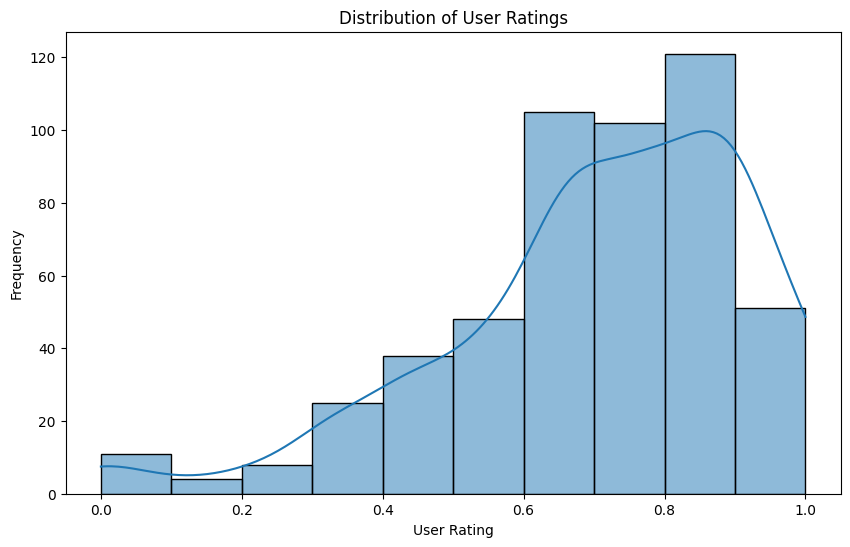

In [29]:
# Extracting Insights through Descriptive Statistics
# Distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['User Rating'], bins=10, kde=True)
plt.title("Distribution of User Ratings")
plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.show()

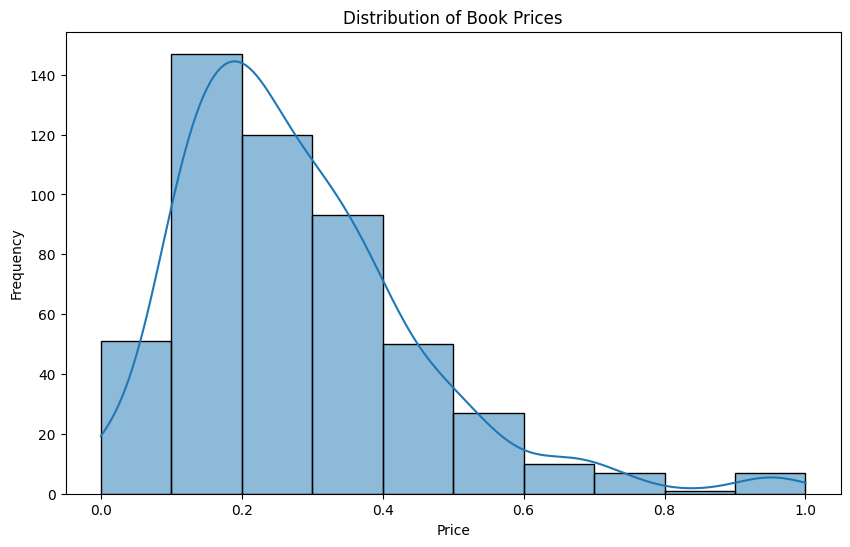

In [30]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=10, kde=True)
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

C:\Users\Dev\AppData\Local\Temp\ipykernel_11740\96818557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Reviews', data=genre_stats, palette='viridis')


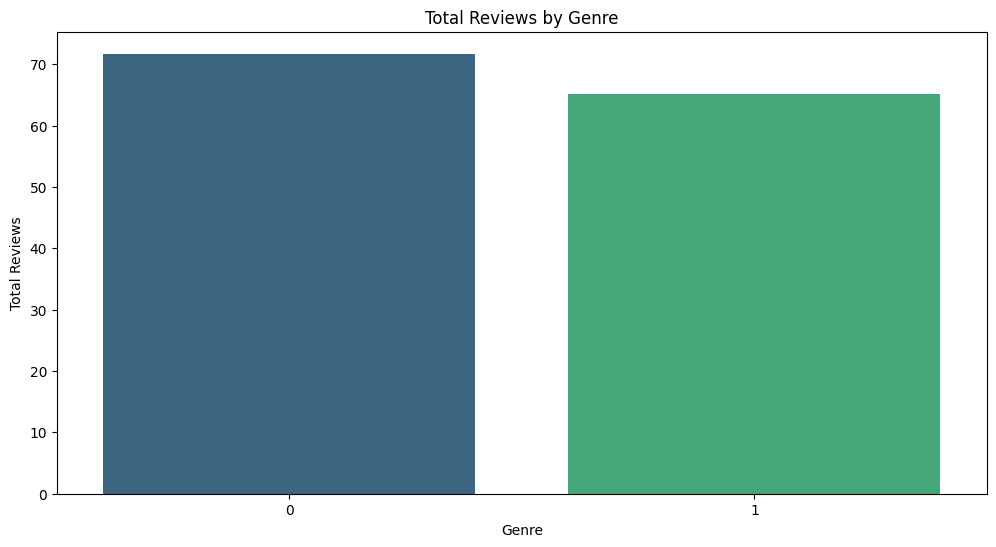

In [31]:
# Bar plot of total reviews by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Reviews', data=genre_stats, palette='viridis')
plt.title("Total Reviews by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Reviews")
plt.show()

C:\Users\Dev\AppData\Local\Temp\ipykernel_11740\1645623439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='User Rating', data=genre_stats, palette='viridis')


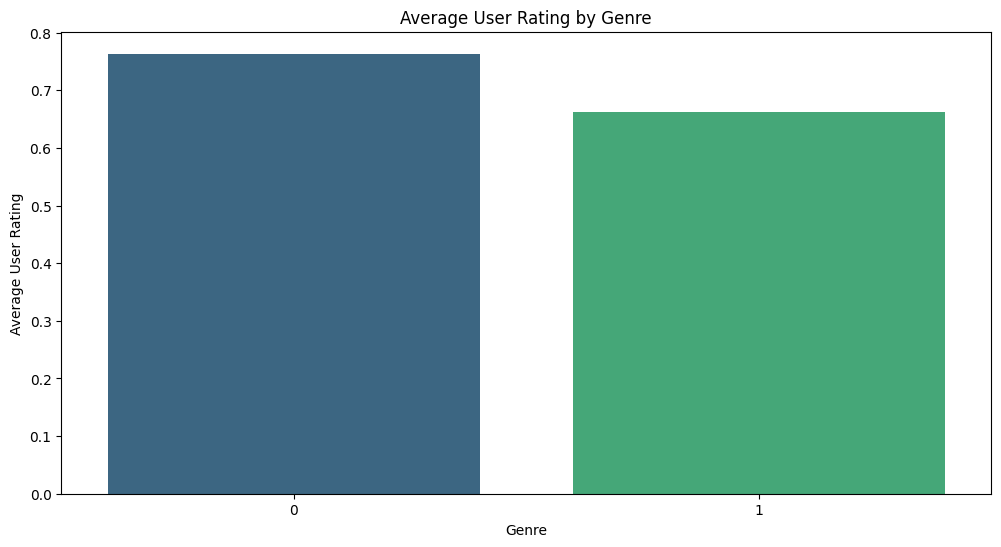

In [32]:
# Bar plot of average user rating by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='User Rating', data=genre_stats, palette='viridis')
plt.title("Average User Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average User Rating")
plt.show()

STEP D : Data Visualization


C:\Users\Dev\AppData\Local\Temp\ipykernel_11740\3143026239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='User Rating', data=data, palette='viridis')


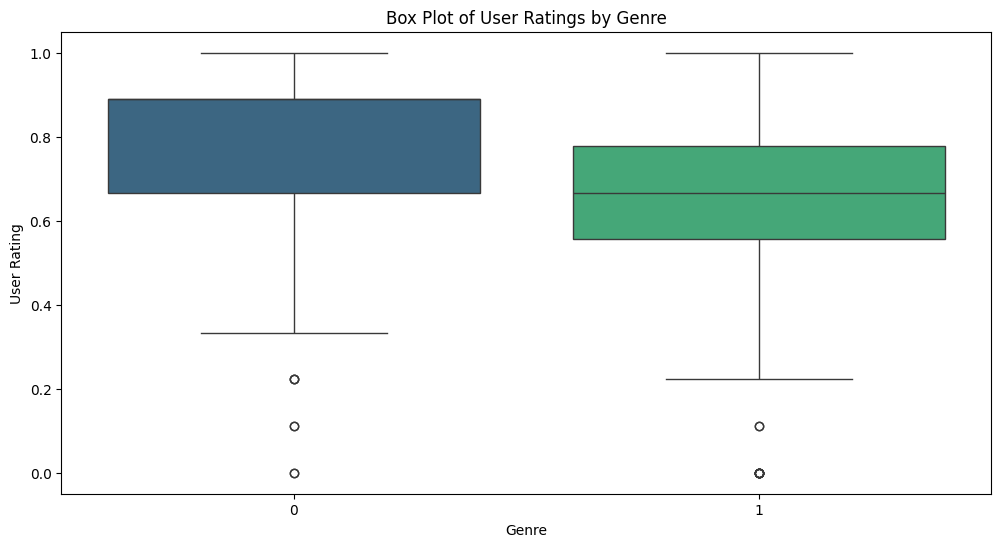

In [33]:
# Box plot of User Ratings by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='User Rating', data=data, palette='viridis')
plt.title("Box Plot of User Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("User Rating")
plt.show()

C:\Users\Dev\AppData\Local\Temp\ipykernel_11740\2376290872.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Price', data=data, palette='viridis')


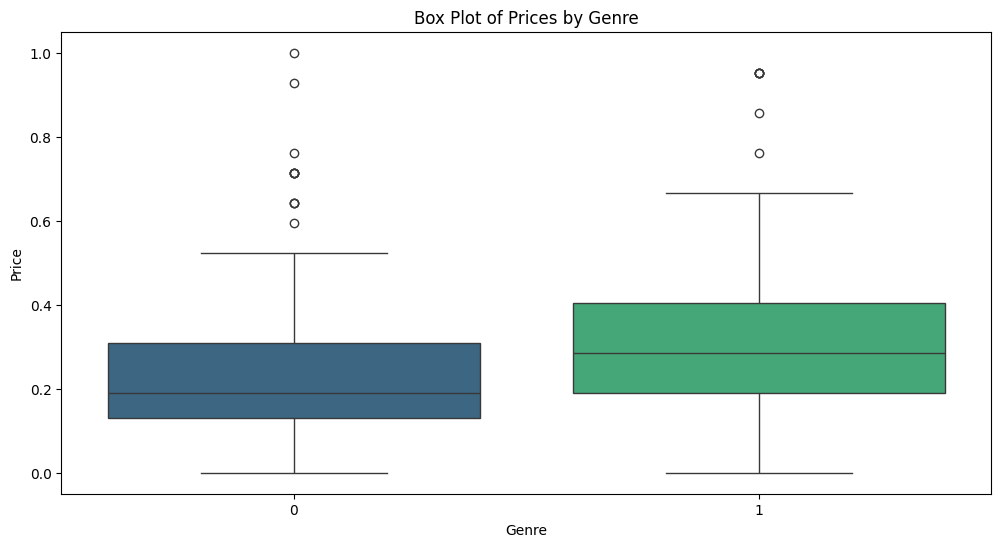

In [34]:
# Box plot of Prices by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Price', data=data, palette='viridis')
plt.title("Box Plot of Prices by Genre")
plt.xlabel("Genre")
plt.ylabel("Price")
plt.show()

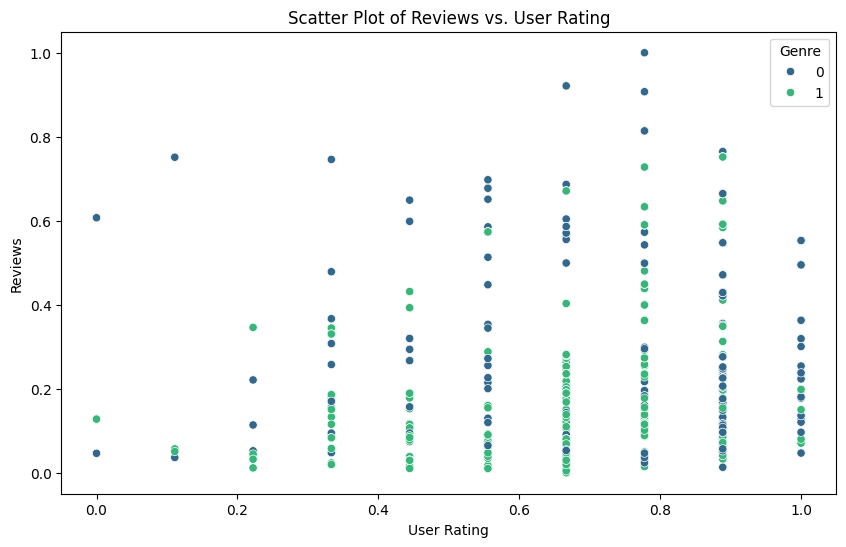

In [35]:
# Creating scatter plots to explore relationships between user ratings, reviews, and prices.
# Scatter plot of Reviews vs. User Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='User Rating', y='Reviews', data=data, hue='Genre', palette='viridis')
plt.title("Scatter Plot of Reviews vs. User Rating")
plt.xlabel("User Rating")
plt.ylabel("Reviews")
plt.legend(title='Genre')
plt.show()

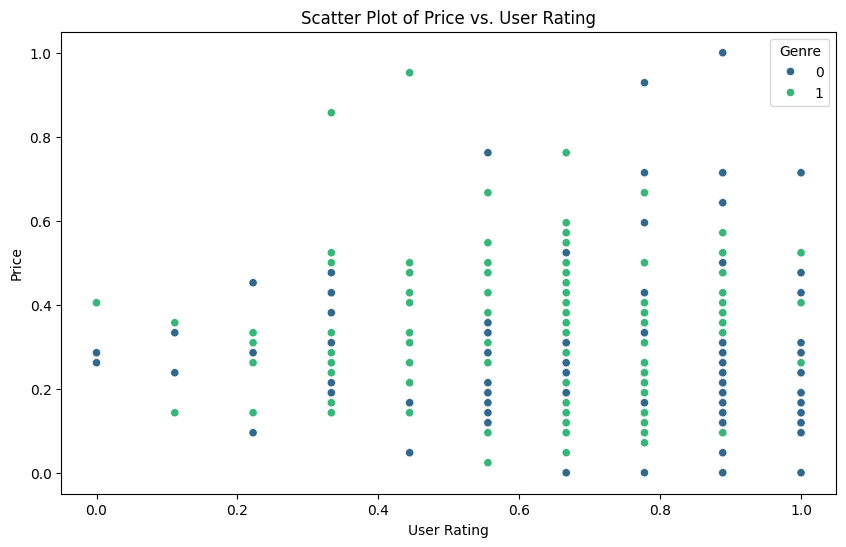

In [36]:
# Scatter plot of Price vs. User Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='User Rating', y='Price', data=data, hue='Genre', palette='viridis')
plt.title("Scatter Plot of Price vs. User Rating")
plt.xlabel("User Rating")
plt.ylabel("Price")
plt.legend(title='Genre')
plt.show()

Hypothesis 1: Independent t-test
Formulation:

Null Hypothesis (H0): The average user rating of Fiction books is equal to that of Non-Fiction books.
Alternative Hypothesis (H1): The average user rating of Fiction books is different from that of Non-Fiction books.

In [46]:
# Separate user ratings by genre
fiction_ratings = data[data['Genre'] == 'Fiction']['User Rating']
non_fiction_ratings = data[data['Genre'] == 'Non Fiction']['User Rating']

In [40]:
# Perform independent t-test
t_stat, p_value = stats.ttest_ind(fiction_ratings, non_fiction_ratings)

print("Hypothesis 1: Independent t-test results")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Hypothesis 1: Independent t-test results
T-statistic: nan
P-value: nan


In [41]:
if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in average user ratings between Fiction and Non-Fiction books.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in average user ratings between Fiction and Non-Fiction books.")

Result: Fail to reject the null hypothesis. There is no significant difference in average user ratings between Fiction and Non-Fiction books.


Hypothesis 2: Chi-square test for independence
Formulation:

Null Hypothesis (H0): The distribution of user ratings is independent of the genre of the book.
Alternative Hypothesis (H1): The distribution of user ratings is dependent on the genre of the book.

In [42]:
# Create a contingency table for user ratings and genre
contingency_table = pd.crosstab(data['User Rating'], data['Genre'])


In [43]:
# Perform Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nHypothesis 2: Chi-square test results")
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)


Hypothesis 2: Chi-square test results
Chi-square statistic: 67.11543489468049
P-value: 5.5842726335725095e-11


In [44]:
if p_value < 0.05:
    print("Result: Reject the null hypothesis. The distribution of user ratings is dependent on the genre of the book.")
else:
    print("Result: Fail to reject the null hypothesis. The distribution of user ratings is independent of the genre of the book.")

Result: Reject the null hypothesis. The distribution of user ratings is dependent on the genre of the book.


STEP F : Advanced Analysis

In [47]:
#Linear Regression
# Objective: Predict book prices based on features like user rating and number of reviews.

# Feature selection
features = data[['User Rating', 'Reviews']]
target_price = data['Price']



In [49]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for regression
X_train, X_test, y_train, y_test = train_test_split(features, target_price, test_size=0.3, random_state=42)


In [51]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Regression to predict book prices
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_price = lin_reg.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Evaluate regression model
mse = mean_squared_error(y_test, y_pred_price)
r2 = r2_score(y_test, y_pred_price)

print("Linear Regression Model Performance")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Linear Regression Model Performance
Mean Squared Error: 0.020781401649056612
R-squared: -0.03603451668103408


In [54]:
#Logistic Regression
#Objective: Classify the genre of the book based on features like user rating, number of reviews, and price.

# Feature selection
features = data[['User Rating', 'Reviews', 'Price']]
target_genre = data['Genre'].apply(lambda x: 1 if x == 'Fiction' else 0)  # Convert Genre to binary: Fiction = 1, Non Fiction = 0

In [55]:
# Split the data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(features, target_genre, test_size=0.3, random_state=42)


In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocess the dataset
data['User Rating'] = data['User Rating'].astype(float)
data['Reviews'] = data['Reviews'].astype(int)
data['Price'] = data['Price'].astype(float)


In [62]:
# Convert Genre to binary: Fiction = 1, Non Fiction = 0
data['Genre_binary'] = data['Genre'].apply(lambda x: 1 if x == 'Fiction' else 0)

In [63]:
# Feature selection
features = data[['User Rating', 'Reviews', 'Price']]
target_genre = data['Genre_binary']

In [64]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target_genre, test_size=0.3, random_state=42, stratify=target_genre)

In [69]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Genre' is the column containing genre labels (strings)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [70]:
# Support Vector Machine (SVM) classification
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_genre = svm_classifier.predict(X_test)

ValueError: The number of classes has to be greater than one; got 1 class

In [66]:
# Evaluate classification model
accuracy = accuracy_score(y_test, y_pred_genre)
conf_matrix = confusion_matrix(y_test, y_pred_genre)
class_report = classification_report(y_test, y_pred_genre)

print("Support Vector Machine (SVM) Model Performance")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

NameError: name 'y_pred_genre' is not defined

In [67]:
# Check unique values in the target variable
print("Unique values in target variable (Genre_binary):", target_genre.unique())


Unique values in target variable (Genre_binary): [0]
